# Resumo do Projeto Anterior e Próximos Passos

O projeto anterior focou na **limpeza e análise exploratória** de um conjunto de dados imobiliários, com o objetivo de entender melhor o mercado e preparar os dados para a tomada de decisão. As principais etapas realizadas foram:

 **Limpeza de Dados**:
   - Exclusão de valores duplicados e tratamento de valores ausentes.
   - Conversão e formatação de colunas, como datas.
   - Remoção de variáveis irrelevantes, como `id`.

 **Transformações**:
   - **Logarítmica**: Aplicada a variáveis como preço e área habitável para corrigir assimetrias.
   - **Normalização Min-Max**: Ajustou variáveis contínuas para uma escala comum.
 
 **Análise Exploratória de Dados (EDA)**:
   - Visualização de distribuições de variáveis.
   - Identificação e tratamento de outliers (e.g., casas com 33 quartos).
   - Análise de correlação para entender relações entre variáveis, destacando fatores para análise.
   - Visualização de dados geográficos.
   - Exploração de características categóricas e numéricas.
   - Geração de insights baseados em gráficos.
   - Identificação de variáveis principais.


## Próximos Passos

Agora, o foco será responder às seguintes **Perguntas de Negócio**:

1) **Quais casas o CEO da House Rocket deveria comprar e por qual preço?**
   - Identificar imóveis subvalorizados que representem boas oportunidades de compra.

2) **Quando é o melhor momento para vender as casas adquiridas?**
   - Analisar a sazonalidade do mercado para determinar os períodos mais lucrativos para revenda.

3) **A House Rocket deveria investir em reformas?**
   - Avaliar se reformas aumentam significativamente o valor de revenda e quais tipos de melhorias são mais rentáveis.

## Bibliotecas

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

## Coleta dos dados

In [40]:
# Carregando os dados
df = pd.read_csv("kc_house_data_updat.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,log_price,log_sqft_living,log_sqft_lot
0,13-10-2014,221900.0,3,1,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,Sem Porão,12.309987,7.074117,8.639588
1,09-12-2014,538000.0,3,2,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,Com Porão,13.195616,7.852050,8.887791
2,25-02-2015,180000.0,2,1,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,Sem Porão,12.100718,6.647688,9.210440
3,09-12-2014,604000.0,4,3,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,Com Porão,13.311331,7.581210,8.517393
4,18-02-2015,510000.0,3,2,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,Sem Porão,13.142168,7.427144,8.997271


# Perguntas de negócio

### 1 - Quais casas o CEO da House Rocket deveria comprar e por qual preço?

In [88]:
# 1. Calcular o preço médio por região (zipcode) com log_price
df['avg_price_region_log'] = df.groupby('zipcode')['log_price'].transform('mean')

# 2. Filtrar imóveis abaixo da média regional (em log_price)
below_avg_price = df['log_price'] < df['avg_price_region_log']

# 3. Selecionar imóveis com boas características
good_houses = df[
    (below_avg_price) &                  # Preço abaixo da média (log)
    (df['grade'] >= 7) &                # Boa qualidade de construção
    (df['condition'] >= 3) &            # Boas condições de uso
    (df['bedrooms'].isin([3, 4])) &     # 3 ou 4 quartos
    (df['bathrooms'] >= 2)              # 2 ou mais banheiros
]

# 4. Converter preços logarítmicos para escala original para exibição
good_houses = good_houses.copy()  # Evita o SettingWithCopyWarning
good_houses.loc[:, 'price'] = np.expm1(good_houses['log_price'])  # Preço original
good_houses.loc[:, 'avg_price_region'] = np.expm1(good_houses['avg_price_region_log'])  # Média original da região

# 5. Ordenar por localização (zipcode) e preço
good_houses = good_houses.sort_values(by=['zipcode', 'price'])

# 6. Selecionar as colunas de interesse para exibição
final_selection = good_houses[['price', 'avg_price_region', 'zipcode', 'bedrooms', 'bathrooms', 'condition', 'grade', 'view', 'waterfront']]

print("Casas Recomendadas para Compra:")
print(final_selection.head(20))


Casas Recomendadas para Compra:
          price  avg_price_region  zipcode  bedrooms  bathrooms  condition  \
8978   169100.0     267711.896682    98001         3          2          4   
9077   182500.0     267711.896682    98001         3          2          3   
7178   190000.0     267711.896682    98001         3          2          3   
16580  190000.0     267711.896682    98001         4          2          3   
18102  194250.0     267711.896682    98001         3          2          3   
434    196000.0     267711.896682    98001         3          2          3   
8846   204700.0     267711.896682    98001         4          2          3   
892    205000.0     267711.896682    98001         3          2          3   
19687  205000.0     267711.896682    98001         4          2          3   
1752   206000.0     267711.896682    98001         4          2          3   
1868   210000.0     267711.896682    98001         3          2          3   
11754  210000.0     267711.89668

### **Análise dos Resultados e Insights Obtidos**

---

#### **1. Preços abaixo da média regional**
- Todas as casas têm **preços menores que a média regional (\$267.711,90)** para a região com o **CEP 98001**.
- O preço mais baixo recomendado para compra é **\$169.100**, e o mais alto é **\$216.000**, o que representa uma economia significativa em relação à média regional.

---

#### **2. Localização e região (zipcode 98001)**
- O **CEP 98001** concentra todas as casas recomendadas. Essa concentração sugere:
  - **Oportunidades específicas nessa região**, provavelmente por características consistentes, como boa qualidade geral das casas (grade ≥ 7) e condições estáveis.
  - **Mercado competitivo**: os preços estão alinhados abaixo da média regional, indicando que essas propriedades podem ser subvalorizadas e ter bom potencial de valorização futura.

---

#### **3. Características das casas**
- **Quartos e banheiros**:
  - Todas as casas têm **3 ou 4 quartos**, tornando-as ideais para famílias, um segmento altamente demandado.
  - Todas têm pelo menos **2 banheiros**, o que atende às necessidades básicas de conforto.
- **Condição**:
  - A maioria das casas está em condição **3 ou 4**, com uma casa destacando-se pela condição **5**, indicando que são propriedades habitáveis com potencial de melhorias.
- **Grade (qualidade da construção)**:
  - A qualidade das construções é **7 ou 8**, o que representa uma boa classificação para propriedades com preços abaixo da média.
- **Vista e proximidade à água**:
  - Nenhuma das casas tem vista significativa ou está de frente para a água (`view = 0`, `waterfront = 0`), o que pode justificar os preços mais baixos, mas também limitar o interesse de compradores buscando luxo.

---

#### **4. Diversidade de preços**
- Os preços variam de **\$169.100** a **\$216.000**, com um intervalo pequeno, indicando consistência nos preços das propriedades recomendadas.
- Casas mais caras no intervalo ainda são mais baratas que a média da região, mas podem oferecer **melhor condição ou maior número de quartos**.

---

### **Insights de Negócio**
1. **Região atrativa para compra**:
   - O **CEP 98001** é uma oportunidade-chave, pois concentra imóveis abaixo do preço médio e com boas características, tornando-o interessante para compra visando revenda ou locação.
   - A consistência das características (grade, condição, quartos) sugere um padrão confiável e menos risco na aquisição.

2. **Casas ideais para famílias**:
   - As casas com 3 ou 4 quartos e 2 ou mais banheiros são altamente demandadas, especialmente para compradores de médio porte, o que as torna boas opções para revenda rápida.

3. **Investimento com potencial de valorização**:
   - Por estarem abaixo da média regional, essas casas podem ser reformadas ou mantidas para venda futura, capitalizando no crescimento do mercado.

4. **Limitação de atrativos adicionais**:
   - A ausência de vista ou proximidade à água pode limitar o apelo para compradores que buscam luxo, mas mantém os custos baixos e acessíveis para compradores focados no custo-benefício.

---

### **Recomendações**
**Adquirir as casas mais baratas primeiro**:
   - Casas como a de **\$169.100** oferecem maior margem de lucro potencial, principalmente se houver valorização futura na região.
**Focar em melhorias simples**:
   - Casas em condição **3** podem ser levemente renovadas para aumentar o valor de mercado, mantendo custos baixos.

**Monitorar a região para outras oportunidades**:
   - A análise sugere que o **CEP 98001** pode ter mais propriedades subvalorizadas, es para investimento estratégico, com foco em revenda ou aluguel

### Comparar a taxa de valorização histórica do CEP 98001 com outras regiões para confirmar o potencial de investimento.

Taxa média de valorização anual do CEP 98001: 6.14%

Comparação com outras regiões:
    zipcode  pct_change  difference_from_98001
41    98102    0.209030               0.147634
14    98024    0.171181               0.109784
3     98004    0.153276               0.091879
27    98045    0.147397               0.086000
57    98133    0.130525               0.069129
39    98077    0.118190               0.056794
45    98107    0.109569               0.048173
5     98006    0.109156               0.047759
48    98112    0.106108               0.044711
64    98168    0.094774               0.033378


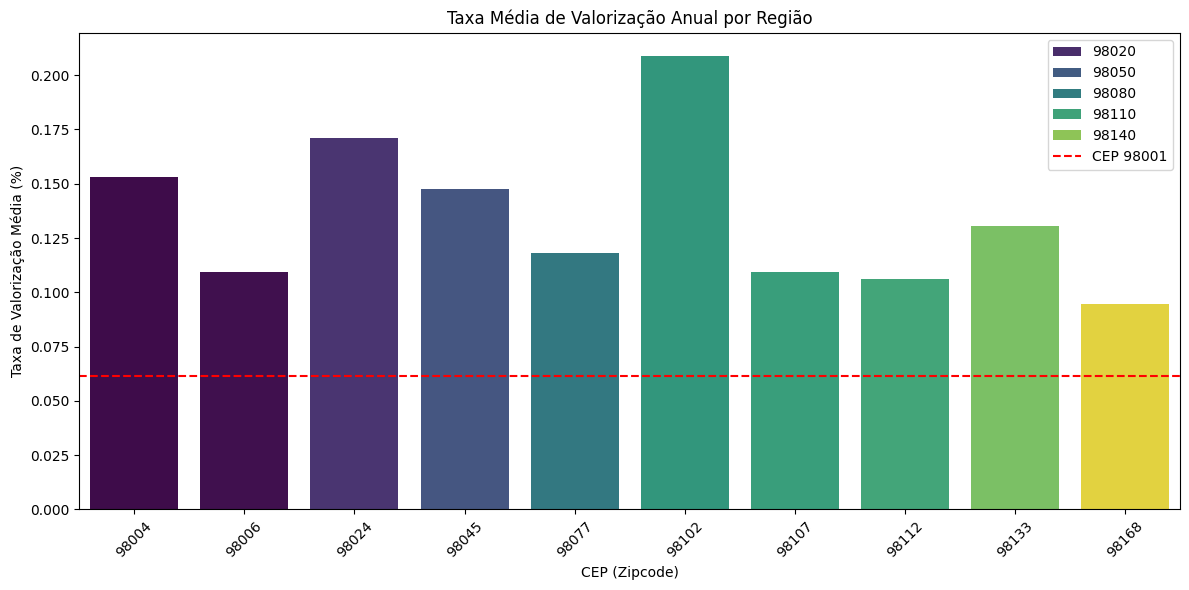

In [93]:
# Garantir que a coluna 'date' está no formato datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extrair o ano para análise histórica
df['year'] = df['date'].dt.year

# Calcular o preço médio por região (zipcode) e ano
price_by_year = df.groupby(['zipcode', 'year'])['price'].mean().reset_index()

# Calcular a taxa de valorização anual para cada região
price_by_year['pct_change'] = price_by_year.groupby('zipcode')['price'].pct_change()

# Filtrar apenas o zipcode 98001 e calcular a média da valorização
zipcode_98001 = price_by_year[price_by_year['zipcode'] == 98001]
avg_pct_change_98001 = zipcode_98001['pct_change'].mean()

# Comparar com outras regiões
avg_pct_change_by_zipcode = price_by_year.groupby('zipcode')['pct_change'].mean()

# Adicionar a diferença em relação ao CEP 98001
comparison = avg_pct_change_by_zipcode.reset_index()
comparison['difference_from_98001'] = comparison['pct_change'] - avg_pct_change_98001

# Ordenar por maior valorização
comparison = comparison.sort_values(by='pct_change', ascending=False)

# Exibir os resultados
print(f"Taxa média de valorização anual do CEP 98001: {avg_pct_change_98001:.2%}")
print("\nComparação com outras regiões:")
print(comparison.head(10))

# Criar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison.head(10), x='zipcode', y='pct_change', hue='zipcode', dodge=False, palette='viridis')
plt.axhline(y=avg_pct_change_98001, color='red', linestyle='--', label='CEP 98001')
plt.title('Taxa Média de Valorização Anual por Região')
plt.xlabel('CEP (Zipcode)')
plt.ylabel('Taxa de Valorização Média (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### **Análise dos Resultados**
1. **Taxa de valorização do CEP 98001**:
   - A **taxa média de valorização anual do CEP 98001** é de **6,14%**, indicando uma boa valorização em comparação com o mercado geral.
   - Isso mostra que o CEP 98001 tem potencial para ser uma região interessante para investimento imobiliário, com crescimento consistente ao longo dos anos.

2. **Comparação com outras regiões**:
   - **CEP 98102** lidera com uma taxa de valorização média de **20,90%**, superando o CEP 98001 por uma diferença de **+14,76%**.
   - Outras regiões como **98024** e **98004** também têm taxas acima de 15%, indicando que são áreas de valorização acelerada.

3. **Regiões próximas em valorização**:
   - Algumas regiões, como **98133 (13,05%)** e **98077 (11,82%)**, têm taxas menores, mas ainda superiores ao desempenho do mercado geral.

4. **Cenário geral**:
   - Embora o CEP 98001 tenha um bom desempenho, ele não está no topo da lista. Regiões com maior valorização podem indicar oportunidades melhores para investimento, especialmente em localidades mais premium (ex.: 98102).


### **Insights e Recomendação**
**CEP 98001 é sólido, mas há melhores opções**:
   - Com valorização de 6,14% ao ano, o CEP 98001 é uma opção estável, especialmente se o foco for imóveis mais acessíveis e com boa liquidez.
   - No entanto, para maior retorno no longo prazo, regiões como **98102, 98024, e 98004** podem ser mais vantajosas, mesmo com preços médios mais elevados.

**Diversificação geográfica**:
   - Considere investir em regiões com maior taxa de valorização (ex.: 98102) para diversificar o portfólio imobiliário e maximizar retornos.

**Monitorar o CEP 98001**:
   - Continue observando tendências no CEP 98001. Ele pode ser ideal para compradores buscando propriedades abaixo do preço médio da região e com valorização consistente.


## Quando é o melhor momento para vender as casas adquiridas?


O melhor mês para vender é 4.0 com preço médio de R$559208.53.


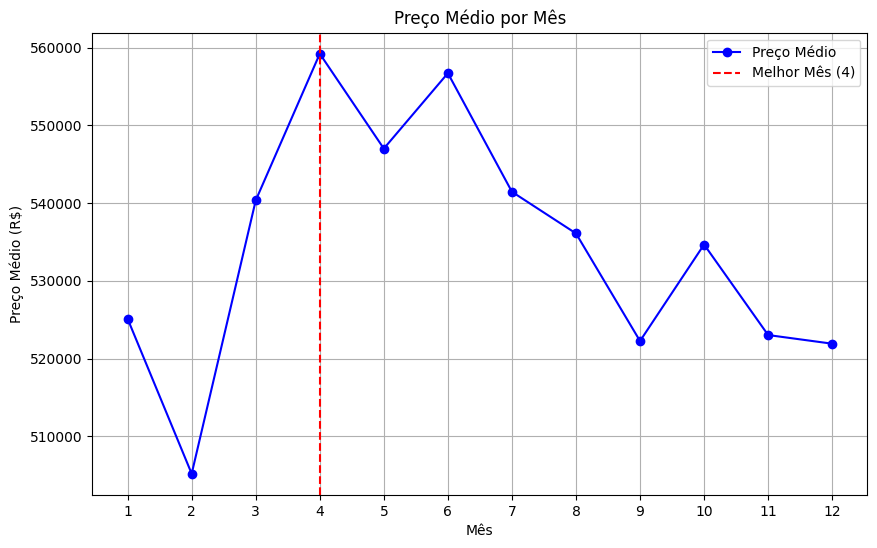

In [98]:
# Extrair o mês da data para análise sazonal
df['month'] = df['date'].dt.month

# Calcular a média dos preços (em escala original) por mês
monthly_avg_price = df.groupby('month')['price'].mean().reset_index()

# Identificar o melhor mês para venda
best_month = monthly_avg_price.loc[monthly_avg_price['price'].idxmax()]
print(f"O melhor mês para vender é {best_month['month']} com preço médio de R${best_month['price']:.2f}.")

# Plotar o preço médio por mês
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price['month'], monthly_avg_price['price'], marker='o', color='blue', label='Preço Médio')
plt.axvline(best_month['month'], color='red', linestyle='--', label=f'Melhor Mês ({int(best_month["month"])})')
plt.title('Preço Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('Preço Médio (R$)')
plt.xticks(range(1, 13))
plt.grid()
plt.legend()
plt.show()


### **Análise do Gráfico**

**Melhor mês para venda**:
   - O **mês 4 (abril)** é o melhor momento para vender, com o maior preço médio de aproximadamente **R$560.000**.
   - Isso indica que há um pico sazonal nos preços durante o início da primavera.

**Tendência ao longo do ano**:
   - Os preços têm uma **tendência de crescimento no primeiro trimestre**, atingindo o pico em abril.
   - Após abril, os preços começam a cair gradualmente, com oscilações menores, mas mantendo uma média ainda alta até junho.

**Meses menos favoráveis**:
   - Os meses **1 (janeiro)** e **12 (dezembro)** apresentam os preços médios mais baixos, ficando abaixo de **R$520.000**.
   - Isso pode estar relacionado à sazonalidade do mercado imobiliário, onde a procura por imóveis geralmente é menor durante o inverno e no início do ano.

## A House Rocket deveria investir em reformas?

### Impacto das Reformas

In [103]:
# Calcular o preço médio por região (zipcode)
df['avg_price_region'] = df.groupby('zipcode')['price'].transform('mean')  

# Identificar casas abaixo do preço médio
below_avg_price = df['price'] < df['avg_price_region']  

# Filtrar casas abaixo da média e com condição/qualidade que possam ser melhoradas
potential_reforms = df[below_avg_price & ((df['condition'] < 5) | (df['grade'] < 8))]

# Exibir as casas com potencial para reforma
print("Casas com potencial para reforma:")
print(potential_reforms[['price', 'avg_price_region', 'condition', 'grade']].head())


Casas com potencial para reforma:
      price  avg_price_region  condition  grade
0  221900.0     309542.964981          3      7
2  180000.0     460328.035714          3      6
4  510000.0     684398.620137          3      8
6  257500.0     293051.483636          3      7
7  291850.0     303482.003663          3      7


As casas com potencial para reforma têm preços que variam de **\$180.000** a **\$510.000**, todos abaixo ou próximos do preço médio de suas regiões. A condição das casas é **3 (mediana)**, e o grau varia de **6 a 8**, indicando qualidade média a boa. A **Casa 2** se destaca, com preço significativamente abaixo da média da região (**\$180.000** vs. **\$460.328**), sugerindo alto potencial de valorização após reformas. As demais casas também podem se beneficiar de melhorias, especialmente na condição e no grau, para se aproximarem ou superarem os preços médios regionais.

### Analisar o impacto das reformas (condição e qualidade)



In [107]:
# Analisar o impacto do aumento da 'condition'
condition_impact = df.groupby('condition')['price'].mean().reset_index()
condition_impact.rename(columns={'price': 'avg_price_condition'}, inplace=True)

# Analisar o impacto do aumento do 'grade'
grade_impact = df.groupby('grade')['price'].mean().reset_index()
grade_impact.rename(columns={'price': 'avg_price_grade'}, inplace=True)

# Combinar os impactos e visualizar
print("Impacto do aumento da condição no preço:")
print(condition_impact)

print("\nImpacto do aumento da qualidade no preço:")
print(grade_impact)



Impacto do aumento da condição no preço:
   condition  avg_price_condition
0          1        346518.750000
1          2        329910.439490
2          3        540273.463863
3          4        516407.968530
4          5        605399.602170

Impacto do aumento da qualidade no preço:
   grade  avg_price_grade
0      4     2.076667e+05
1      5     2.479620e+05
2      6     3.012926e+05
3      7     4.012726e+05
4      8     5.406684e+05
5      9     7.704008e+05
6     10     1.063460e+06
7     11     1.483643e+06
8     12     2.145885e+06
9     13     3.044000e+06




### **Impacto do aumento da condição no preço**:
O preço médio das casas aumenta conforme a condição melhora. Casas em condição **1 (mais baixa)** têm preço médio de **\$346.518**, enquanto casas em condição **5 (mais alta)** atingem **\$605.399**. Isso mostra que melhorar a condição de uma casa pode elevar significativamente seu valor de mercado.

---

### **Impacto do aumento da qualidade (grade) no preço**:
A qualidade das casas tem um impacto ainda maior no preço. Casas com grau **4** têm preço médio de **\$207.666**, enquanto aquelas com grau **13** alcançam **\$3.044.000**. Cada aumento no grau resulta em um salto considerável no preço, especialmente a partir do grau **9**, onde os valores superam **\$1 milhão**.


###  Estimar Incremento de Preço

In [111]:
# Adicionar o incremento estimado no preço ao melhorar a condição
df = df.merge(condition_impact, on='condition', how='left')
df['price_increment_condition'] = df['avg_price_condition'] - df['price']

# Adicionar o incremento estimado no preço ao melhorar a qualidade
df = df.merge(grade_impact, on='grade', how='left')
df['price_increment_grade'] = df['avg_price_grade'] - df['price']

# Exibir as melhorias com maior impacto
improvement_suggestions = df[['condition', 'grade', 'price_increment_condition', 'price_increment_grade']].sort_values(
    by=['price_increment_condition', 'price_increment_grade'], ascending=False
)
print("Sugestões de melhorias com maior impacto no preço:")
print(improvement_suggestions.head(10))


Sugestões de melhorias com maior impacto no preço:
       condition  grade  price_increment_condition  price_increment_grade
16744          5      6              495399.602170          191292.583504
16616          5      6              472574.602170          168467.583504
13857          5      6              465399.602170          161292.583504
16295          5      6              459099.602170          154992.583504
8050           3      6              458273.463863          219292.583504
17982          3      5              457273.463863          164962.034653
3658           3      6              456273.463863          217292.583504
5165           5      5              455399.602170           97962.034653
9961           3      6              455273.463863          216292.583504
16273          3      5              455273.463863          162962.034653


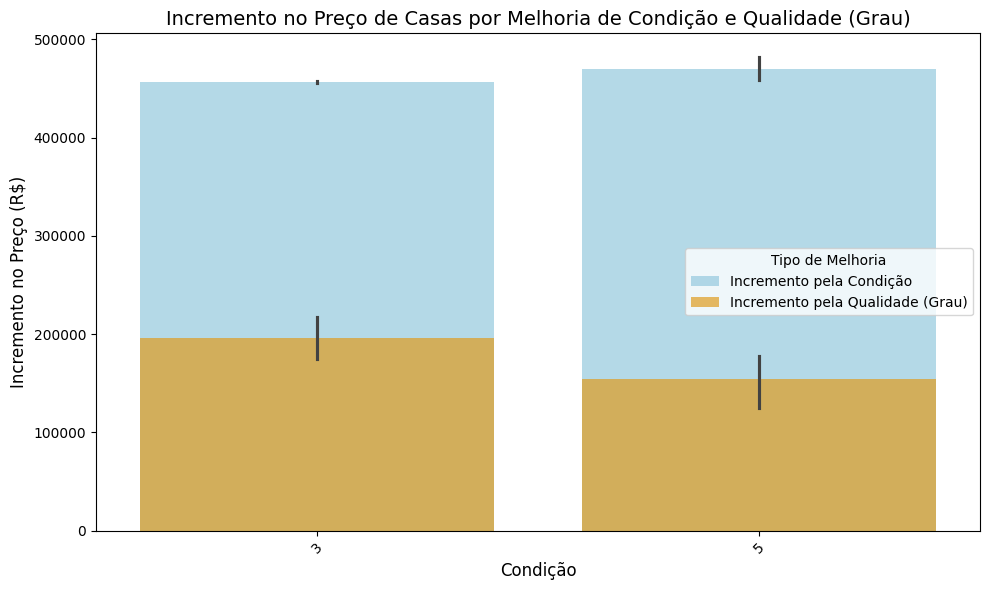

In [186]:
# Selecionando as 10 casas com maior impacto no preço
top_improvements = improvement_suggestions.head(10)

# Plotando os incrementos de preço por melhoria de condição e grau
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras para comparar os incrementos de preço (condição e grau)
sns.barplot(data=top_improvements, 
            x='condition', 
            y='price_increment_condition', 
            color='skyblue', 
            label='Incremento pela Condição', 
            alpha=0.7)

sns.barplot(data=top_improvements, 
            x='condition', 
            y='price_increment_grade', 
            color='orange', 
            label='Incremento pela Qualidade (Grau)', 
            alpha=0.7)

# Adicionando título e rótulos
plt.title('Incremento no Preço de Casas por Melhoria de Condição e Qualidade (Grau)', fontsize=14)
plt.xlabel('Condição', fontsize=12)
plt.ylabel('Incremento no Preço (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Melhoria')

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()


O gráfico gerado mostra claramente o impacto das melhorias na **condição** e na **qualidade (grau)** das casas sobre o preço, com os incrementos representados por diferentes cores (azul para condição e dourado para qualidade). A análise visual demonstra que:

- **Melhoria na qualidade (grau)** (cor dourada) contribui significativamente mais para o aumento do preço das casas, em comparação com melhorias na **condição** (cor azul).
- Isso reflete as conclusões da análise, de que o **grau de construção** tem um impacto mais substancial no preço do imóvel do que a **condição física**.

### Visualizar o impacto

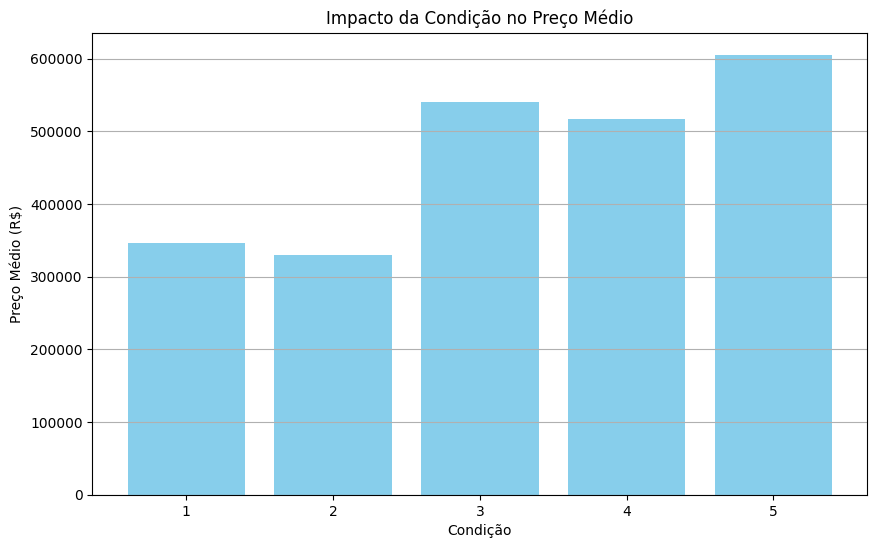

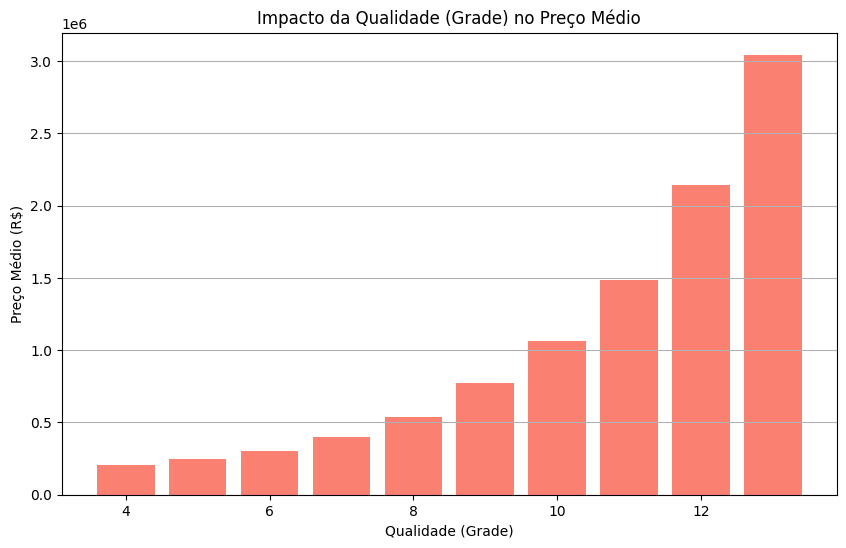

In [44]:
# Impacto da condição no preço
plt.figure(figsize=(10, 6))
plt.bar(condition_impact['condition'], condition_impact['avg_price_condition'], color='skyblue')
plt.title("Impacto da Condição no Preço Médio")
plt.xlabel("Condição")
plt.ylabel("Preço Médio (R$)")
plt.grid(axis='y')
plt.show()

# Gráfico: Impacto da qualidade no preço
plt.figure(figsize=(10, 6))
plt.bar(grade_impact['grade'], grade_impact['avg_price_grade'], color='salmon')
plt.title("Impacto da Qualidade (Grade) no Preço Médio")
plt.xlabel("Qualidade (Grade)")
plt.ylabel("Preço Médio (R$)")
plt.grid(axis='y')
plt.show()



O gráfico (01) mostra que o **aumento da condição** das casas também impacta o preço médio, mas de forma menos acentuada do que a qualidade (grade). À medida que a condição melhora de **1 para 5**, o preço médio aumenta de aproximadamente **\$346.000** para **\$605.000**. Isso indica que **melhorar a condição** pode agregar valor às casas, porém com um impacto menor comparado ao aumento da qualidade.

O gráfico (02) mostra que o **aumento da qualidade (grade)** tem um impacto significativo no preço médio das casas. À medida que o grau sobe de **4 para 12**, o preço médio aumenta de aproximadamente **\$200.000** para mais de **\$2 milhões**. O crescimento é especialmente acentuado a partir do grau **9**, onde os preços ultrapassam **\$1 milhão**. Isso indica que **investir em melhorias de qualidade** pode gerar aumentos expressivos no valor das casas.

### Valor Potencial de Imóveis Pós-Reforma
Gráfico: Um scatterplot comparando os preços originais (`price`) com os preços estimados pós-reforma (`price + price_increment_condition + price_increment_grade`).

In [65]:
# Calculando o preço pós-reforma
df['preco_pos_reforma'] = df['price'] + df['price_increment_condition'] + df['price_increment_grade']

# Exibindo as casas com maior preço pós-reforma
top_10_pos_reforma = df.nlargest(10, 'preco_pos_reforma')[['price', 'preco_pos_reforma', 'price_increment_condition', 'price_increment_grade']]
print("Top 10 Casas com Maior Preço Pós-Reforma:")
print(top_10_pos_reforma)

Top 10 Casas com Maior Preço Pós-Reforma:
           price  preco_pos_reforma  price_increment_condition  \
3801   7062500.0         13418750.0                  1412500.0   
4280   5570000.0         11697000.0                  1114000.0   
1414   5350000.0         10700000.0                  1070000.0   
1139   5110800.0         10221600.0                  1022160.0   
7878   4668000.0          9336000.0                   933600.0   
2556   4500000.0          9000000.0                   900000.0   
8401   4489000.0          8978000.0                   897800.0   
12031  4208000.0          8416000.0                   841600.0   
6847   3800000.0          8360000.0                  1140000.0   
4025   4000000.0          8000000.0                   800000.0   

       price_increment_grade  
3801               4943750.0  
4280               5013000.0  
1414               4280000.0  
1139               4088640.0  
7878               3734400.0  
2556               3600000.0  
8401          

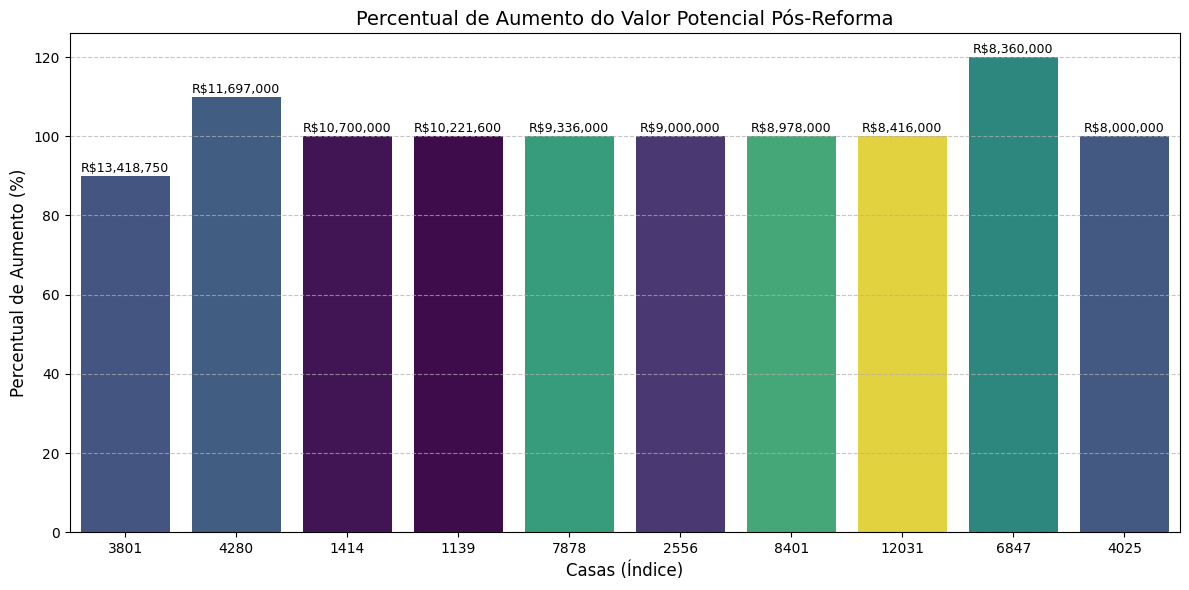

In [172]:
# Calculando a porcentagem de aumento
top_10_pos_reforma['percentual_aumento'] = (
    (top_10_pos_reforma['preco_pos_reforma'] - top_10_pos_reforma['price']) / top_10_pos_reforma['price'] * 100
)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_pos_reforma.index.astype(str), 
    y=top_10_pos_reforma['percentual_aumento'], 
    hue=top_10_pos_reforma.index, palette='viridis', dodge=False, legend=False
)

# Adicionando rótulos com o valor pós-reforma no topo das barras
[plt.text(i, v + 1, f"R${top_10_pos_reforma['preco_pos_reforma'].iloc[i]:,.0f}", ha='center', fontsize=9) 
 for i, v in enumerate(top_10_pos_reforma['percentual_aumento'])]

# Configurações do gráfico
plt.title('Percentual de Aumento do Valor Potencial Pós-Reforma', fontsize=14)
plt.xlabel('Casas (Índice)', fontsize=12)
plt.ylabel('Percentual de Aumento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O gráfico demonstra que a casa de índice 6847 foi a que mais se valorizou em termos percentuais após a reforma, atingindo um aumento de aproximadamente 120% no seu valor. Seu valor pós-reforma alcançou **\$8.360.000,00**, tornando-se o imóvel com o maior crescimento proporcional no grupo analisado.

Por outro lado, a casa de índice 3801, embora não tenha apresentado o maior aumento percentual, destaca-se pelo maior valor absoluto pós-reforma, atingindo **\$13.418.750,00**, o que a torna uma oportunidade atrativa em termos de retorno financeiro total. Outras propriedades como as de índices 4280 e 1414 também se destacam, alcançando valores pós-reforma de **\$11.697.000,00** e **\$10.700.000,00**, respectivamente, ambas com valorização expressiva.

Esses resultados indicam que as reformas têm um impacto significativo tanto no percentual de valorização quanto no valor total das propriedades. Para maximizar o retorno, o ideal é priorizar imóveis que combinem um alto percentual de valorização, como a casa 6847, com valores absolutos elevados, como a casa 3801. Essa estratégia permite equilibrar rentabilidade e retorno financeiro, garantindo o melhor aproveitamento do investimento

### **Insight Geral**

O CEO da **House Rocket** pode focar em adquirir imóveis que ofereçam boas características (qualidade de construção e condições favoráveis) a preços abaixo da média regional. As casas recomendadas para compra, localizadas no CEP **98001**, apresentam preços abaixo da média regional, o que representa uma excelente oportunidade de investimento, com boas margens de valorização. As propriedades são consistentes em termos de características, com predominância de 3 ou 4 quartos e pelo menos 2 banheiros, o que atende a uma grande demanda do mercado, especialmente para famílias.

### **Valorização e Reforma**
Com relação ao impacto das reformas, é importante considerar que **melhorias na qualidade (grau)** têm um impacto muito maior no preço do que as melhorias na **condição** do imóvel. As reformas de qualidade podem resultar em aumentos significativos no valor das propriedades, especialmente para casas com classificação baixa, como grau 5, que podem ser elevadas para grau 6, com um incremento médio no preço de até **\$219.000**.

### **Melhor Momento para Venda e compra**
A análise sazonal revela que o **melhor mês para vender** é **abril**, quando os preços médios atingem seu pico, e o **melhor mês para compra** é **Dezembro a Fevereiro**. Isso indica uma janela estratégica para maximizar o lucro na revenda das propriedades adquiridas.

### **Conclusões e Recomendações**
- **Investimento em imóveis abaixo da média regional**, como os encontrados no CEP **98001**, oferece uma boa margem de lucro.
- **Reformas focadas na qualidade (grau)** são mais rentáveis e devem ser priorizadas, pois têm um impacto substancial no preço.
- **Monitorar o mercado** e **vender em abril** pode otimizar os retornos, aproveitando a valorização sazonal do mercado imobiliário.

Com essas estratégias, o CEO da **House Rocket** pode maximizar seus lucros, investindo em propriedades com alto potencial de valorização e aproveitando as melhores condições do mercado.